Objective: Conduct exploratory data analysis (EDA), derive threat intelligence insights, and build foundations for further cybersecurity automation using ML/NLP pipelines.

#### 1. Data loading and initial overview

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('cybersecurity_attacks.csv')

In [71]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [73]:
print(df.columns)
len(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


25

In [74]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


#### 2. Data Cleaning & Preprocessing

In [75]:
# Parsing timestamps to datetime object

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [76]:
df.dtypes

Timestamp                 datetime64[ns]
Source IP Address                 object
Destination IP Address            object
Source Port                        int64
Destination Port                   int64
Protocol                          object
Packet Length                      int64
Packet Type                       object
Traffic Type                      object
Payload Data                      object
Malware Indicators                object
Anomaly Scores                   float64
Alerts/Warnings                   object
Attack Type                       object
Attack Signature                  object
Action Taken                      object
Severity Level                    object
User Information                  object
Device Information                object
Network Segment                   object
Geo-location Data                 object
Proxy Information                 object
Firewall Logs                     object
IDS/IPS Alerts                    object
Log Source      

In [77]:
# Checking the presence of nulls and displaying their counts
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [78]:
# Calculating the percentage of nulls in each column

(df.isnull().sum()/len(df))*100

Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

In [79]:
# df[df['Malware Indicators'].isnull()].T
df['Malware Indicators'] = df['Malware Indicators'].fillna(value='No')
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna(value='No')
df['Proxy Information'] = df['Proxy Information'].fillna(value='No')
df['Firewall Logs'] = df['Firewall Logs'].fillna(value='No')
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna(value='No')


In [80]:
(df.isnull().sum()/len(df))*100

Timestamp                 0.0
Source IP Address         0.0
Destination IP Address    0.0
Source Port               0.0
Destination Port          0.0
Protocol                  0.0
Packet Length             0.0
Packet Type               0.0
Traffic Type              0.0
Payload Data              0.0
Malware Indicators        0.0
Anomaly Scores            0.0
Alerts/Warnings           0.0
Attack Type               0.0
Attack Signature          0.0
Action Taken              0.0
Severity Level            0.0
User Information          0.0
Device Information        0.0
Network Segment           0.0
Geo-location Data         0.0
Proxy Information         0.0
Firewall Logs             0.0
IDS/IPS Alerts            0.0
Log Source                0.0
dtype: float64

In [81]:
df.duplicated().sum()

0

#### 3 Exploratory Data Analysis (EDA)

###### 3.1 Attack type Distribution

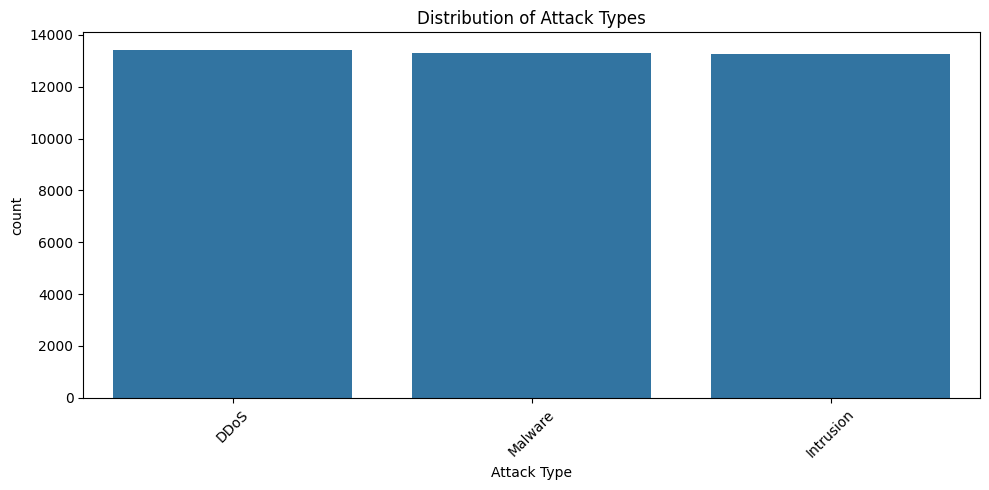

Index(['DDoS', 'Malware', 'Intrusion'], dtype='object', name='Attack Type') Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [85]:
plt.figure(figsize=(10,5))
sns.countplot(data = df , x ='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title("Distribution of Attack Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df['Attack Type'].value_counts().index, df['Attack Type'].value_counts())

###### 3.2 Protocol Usage

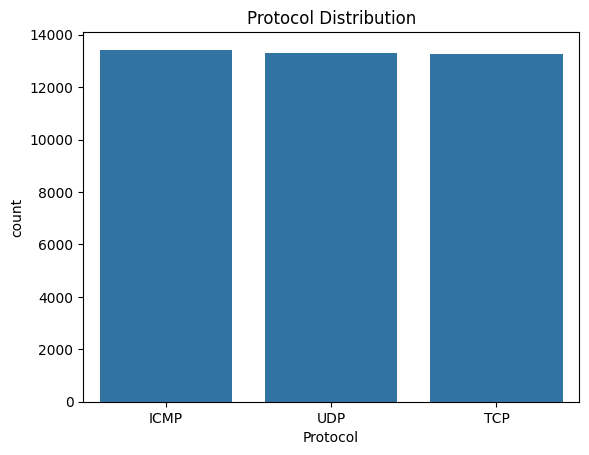

Index(['ICMP', 'UDP', 'TCP'], dtype='object', name='Protocol') Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64


In [87]:
sns.countplot(data = df, x = 'Protocol', order = df['Protocol'].value_counts().index)
plt.title("Protocol Distribution")
plt.show()
print(df['Protocol'].value_counts().index, df['Protocol'].value_counts())


###### 3.3 Packet Length Distribution

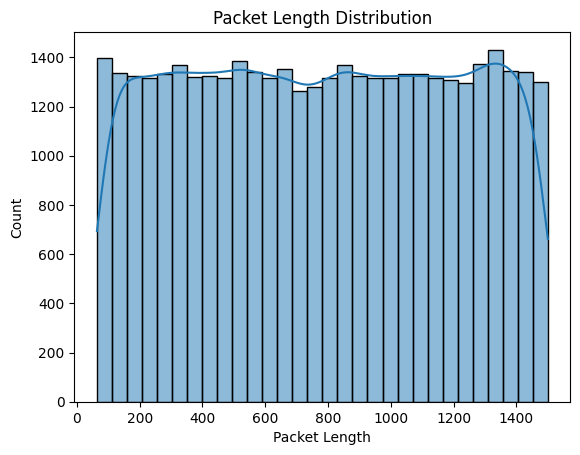

In [84]:
sns.histplot(df['Packet Length'], kde=True, bins=30)
plt.title("Packet Length Distribution")
plt.show()


#### 4 Threat pattern and Correlation Analysis
###### 4.1 Correlation Heatmap

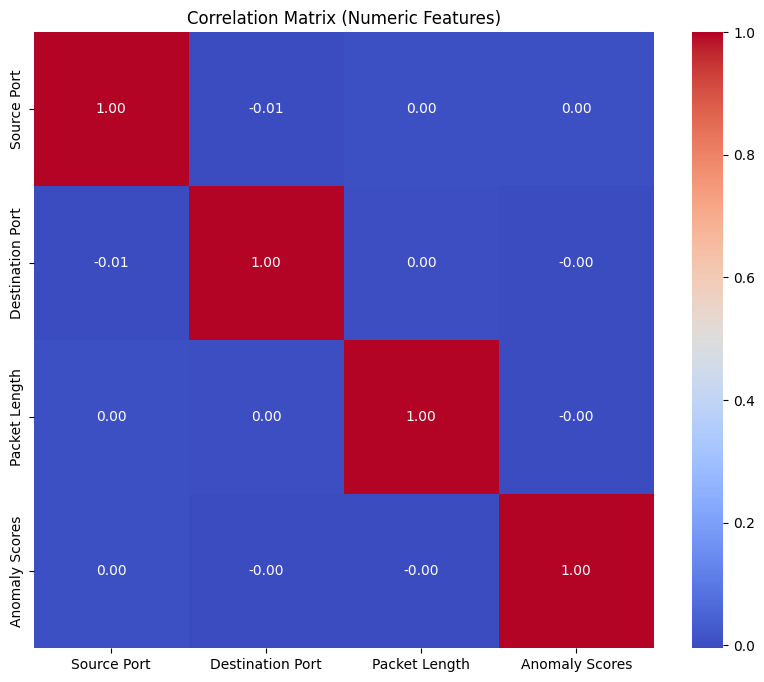

In [88]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


###### 4.2 Anamoly Score vs Packet Length

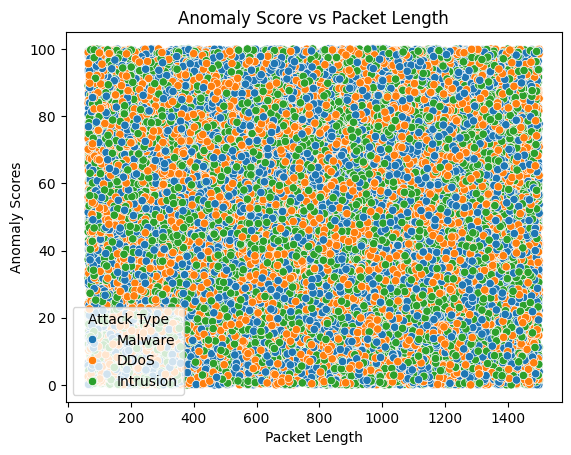

In [89]:
sns.scatterplot(data=df, x='Packet Length', y='Anomaly Scores', hue='Attack Type')
plt.title("Anomaly Score vs Packet Length")
plt.show()

##### 5 Anomaly Score Profiling
###### 5.1 Anomaly Distribution

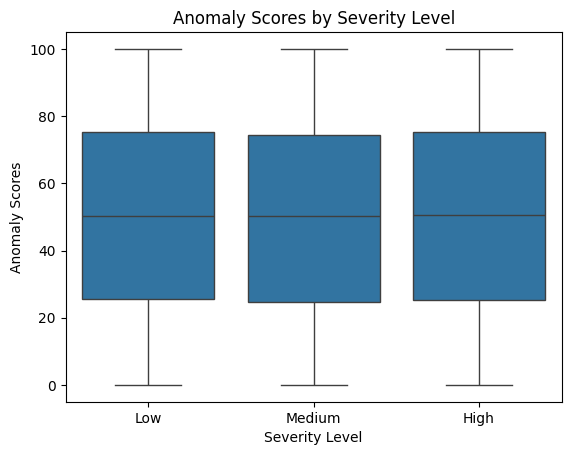

In [90]:
sns.boxplot(data = df, x = 'Severity Level', y = 'Anomaly Scores')
plt.title('Anomaly Scores by Severity Level')
plt.show()

##### 6 Attack Type Profiling
###### 6.1 Severity by Attack Type

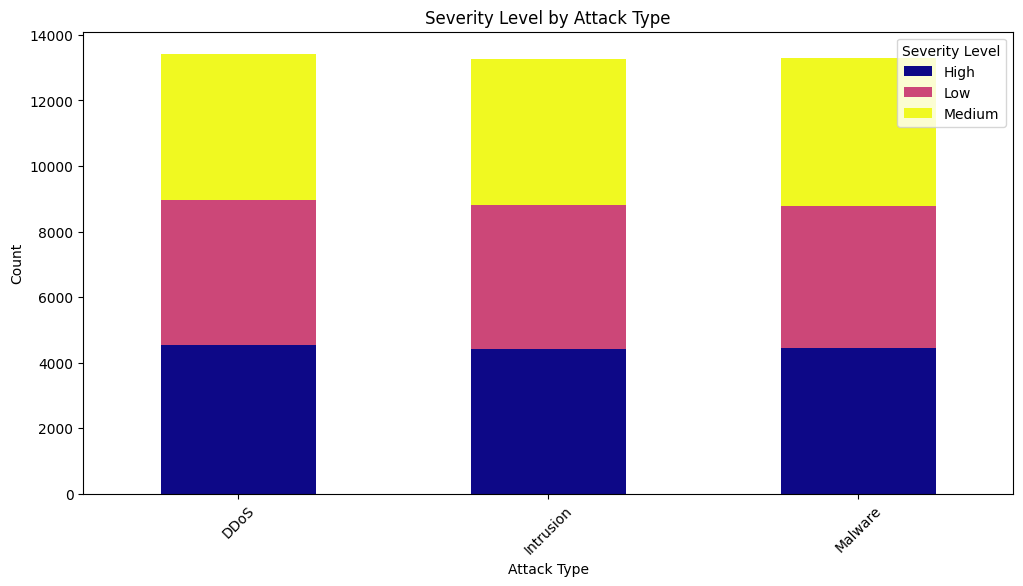

Severity Level  High   Low  Medium
Attack Type                       
DDoS            4523  4450    4455
Intrusion       4427  4374    4464
Malware         4432  4359    4516


In [93]:
attack_severity = df.groupby('Attack Type')['Severity Level'].value_counts().unstack().fillna(0)
attack_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='plasma')
plt.title('Severity Level by Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(attack_severity)

###### 6.2 Attack Timeline

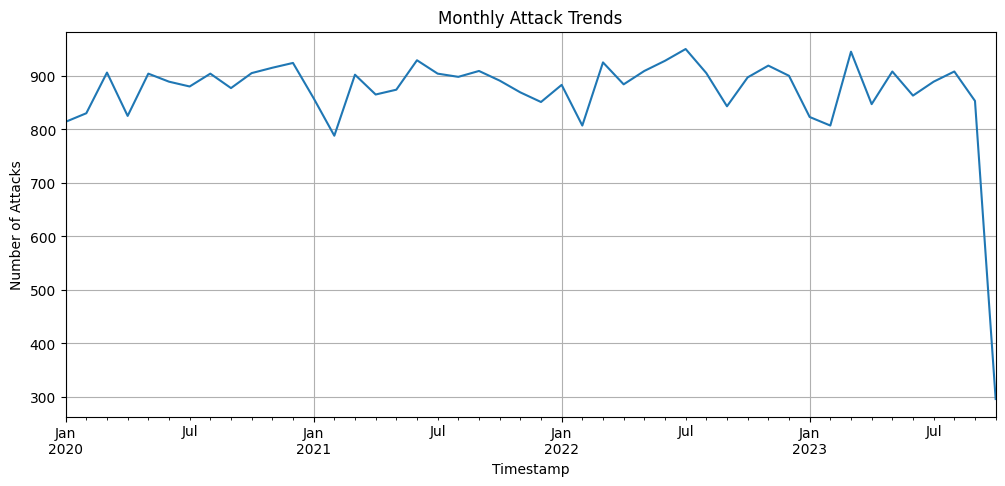

In [95]:
timeline = df.set_index("Timestamp").resample("M")['Attack Type'].count()
timeline.plot(figsize=(12,5), title = 'Monthly Attack Trends')
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()

##### 7 Geo-Location Intelligence
###### 7.1 Most Attacked Regions

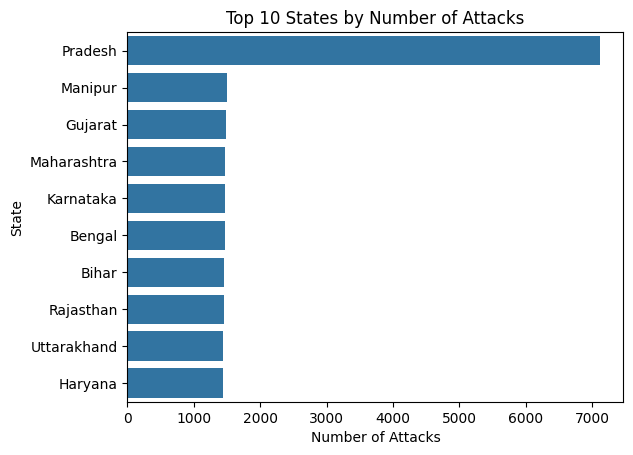

In [96]:
df['State'] = df['Geo-location Data'].str.extract(r'\s*([A-Za-z]+)$')

state_counts = df['State'].value_counts().head(10)
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title("Top 10 States by Number of Attacks")
plt.xlabel("Number of Attacks")
plt.show()

##### 8 Action Effectiveness vs Severity
###### 8.1 Action taken by Severity Level

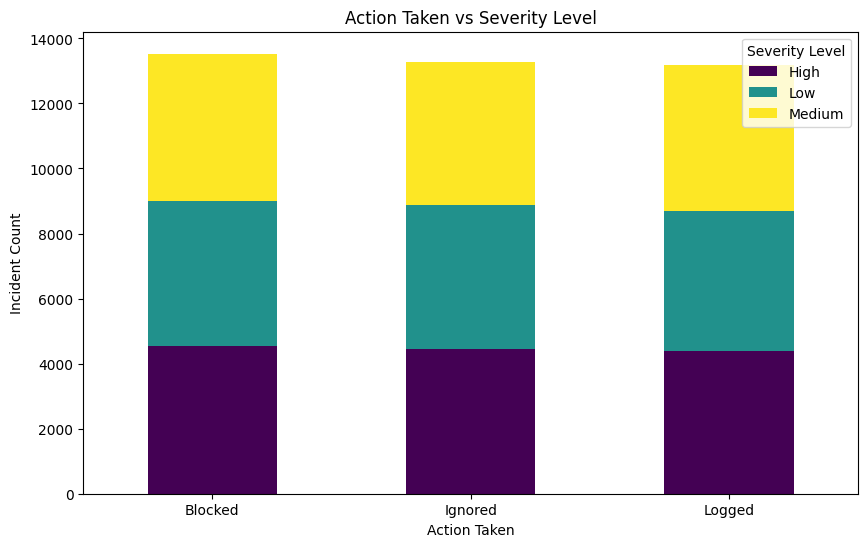

Severity Level,High,Low,Medium
Action Taken,,,
Blocked,4530,4481,4518
Ignored,4460,4409,4407
Logged,4392,4293,4510


In [98]:
action_severity = df.groupby("Action Taken")['Severity Level'].value_counts().unstack().fillna(0)
action_severity.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Action Taken vs Severity Level')
plt.ylabel('Incident Count')
plt.xticks(rotation=0)
plt.show()
action_severity

##### 9 

In [99]:
from sklearn.ensemble import IsolationForest

# Simple anomaly detection preview
iso_forest = IsolationForest(contamination=0.05)
df['Anomaly_Flag'] = iso_forest.fit_predict(df[['Packet Length', 'Anomaly Scores']])
